In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./sample_data/vancouver_no2_temporal_20250711_to_20250712.csv')

In [4]:
df.head()

,latitude,longitude,NO2_molec_cm2,datetime
0,49.15,-123.29,2.715381e+15,2025-07-11 00:00:00
1,49.15,-123.27,3.880122e+15,2025-07-11 00:00:00
2,49.15,-123.25,3.893752e+15,2025-07-11 00:00:00
3,49.15,-123.23,3.907408e+15,2025-07-11 00:00:00
4,49.15,-123.21,4.279015e+15,2025-07-11 00:00:00


In [5]:
df['location_tuple'] = tuple(zip(df['latitude'], df['longitude']))

In [13]:
location_df = df[df['location_tuple'] == (49.15, -123.29)]

In [14]:
location_df['NO2_molec_cm2'] = round(location_df['NO2_molec_cm2'] / 10**15, 4)
location_df['datetime'] = pd.to_datetime(location_df['datetime'])

C:\Users\kuinc\AppData\Local\Temp\ipykernel_1748\2585771470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df['NO2_molec_cm2'] = round(location_df['NO2_molec_cm2'] / 10**15, 4)
C:\Users\kuinc\AppData\Local\Temp\ipykernel_1748\2585771470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location_df['datetime'] = pd.to_datetime(location_df['datetime'])


In [15]:
location_df.head()

,latitude,longitude,NO2_molec_cm2,datetime,location_tuple
0,49.15,-123.29,2.7154,2025-07-11 00:00:00,"(49.15, -123.29)"
220,49.15,-123.29,3.3962,2025-07-11 01:00:00,"(49.15, -123.29)"
440,49.15,-123.29,3.6345,2025-07-11 02:00:00,"(49.15, -123.29)"
660,49.15,-123.29,4.1667,2025-07-11 15:00:00,"(49.15, -123.29)"
880,49.15,-123.29,9.5276,2025-07-11 16:00:00,"(49.15, -123.29)"


In [16]:
location_df.dtypes

latitude                 float64
longitude                float64
NO2_molec_cm2            float64
datetime          datetime64[ns]
location_tuple            object
dtype: object

(array([20280.  , 20280.25, 20280.5 , 20280.75, 20281.  , 20281.25,
        20281.5 , 20281.75, 20282.  ]),
 [Text(20280.0, 0, '07-11 00'),
  Text(20280.25, 0, '07-11 06'),
  Text(20280.5, 0, '07-11 12'),
  Text(20280.75, 0, '07-11 18'),
  Text(20281.0, 0, '07-12 00'),
  Text(20281.25, 0, '07-12 06'),
  Text(20281.5, 0, '07-12 12'),
  Text(20281.75, 0, '07-12 18'),
  Text(20282.0, 0, '07-13 00')])

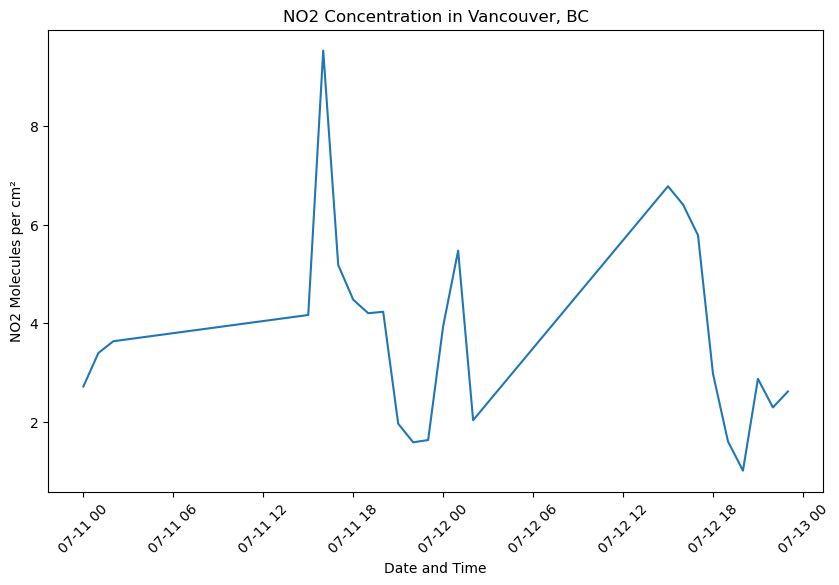

In [17]:
# Create a line plot of NO2_molec_cm2 vs datetime
plt.figure(figsize=(10, 6))
plt.plot(location_df['datetime'], location_df['NO2_molec_cm2'])
plt.xlabel('Date and Time')
plt.ylabel('NO2 Molecules per cm²')
plt.title('NO2 Concentration in Vancouver, BC')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '2025-07-11 00:00:00'),
  Text(1, 0, '2025-07-11 01:00:00'),
  Text(2, 0, '2025-07-11 02:00:00'),
  Text(3, 0, '2025-07-11 15:00:00'),
  Text(4, 0, '2025-07-11 16:00:00'),
  Text(5, 0, '2025-07-11 17:00:00'),
  Text(6, 0, '2025-07-11 18:00:00'),
  Text(7, 0, '2025-07-11 19:00:00'),
  Text(8, 0, '2025-07-11 20:00:00'),
  Text(9, 0, '2025-07-11 21:00:00'),
  Text(10, 0, '2025-07-11 22:00:00'),
  Text(11, 0, '2025-07-11 23:00:00'),
  Text(12, 0, '2025-07-12 00:00:00'),
  Text(13, 0, '2025-07-12 01:00:00'),
  Text(14, 0, '2025-07-12 02:00:00'),
  Text(15, 0, '2025-07-12 15:00:00'),
  Text(16, 0, '2025-07-12 16:00:00'),
  Text(17, 0, '2025-07-12 17:00:00'),
  Text(18, 0, '2025-07-12 18:00:00'),
  Text(19, 0, '2025-07-12 19:00:00'),
  Text(20, 0, '2025-07-12 20:00:00'),
  Text(21, 0, '2025-07-12 21:00:00'),
  Text(22, 0, '2025-07-12 22:00:00'),
  Text(23, 0, '2025-07

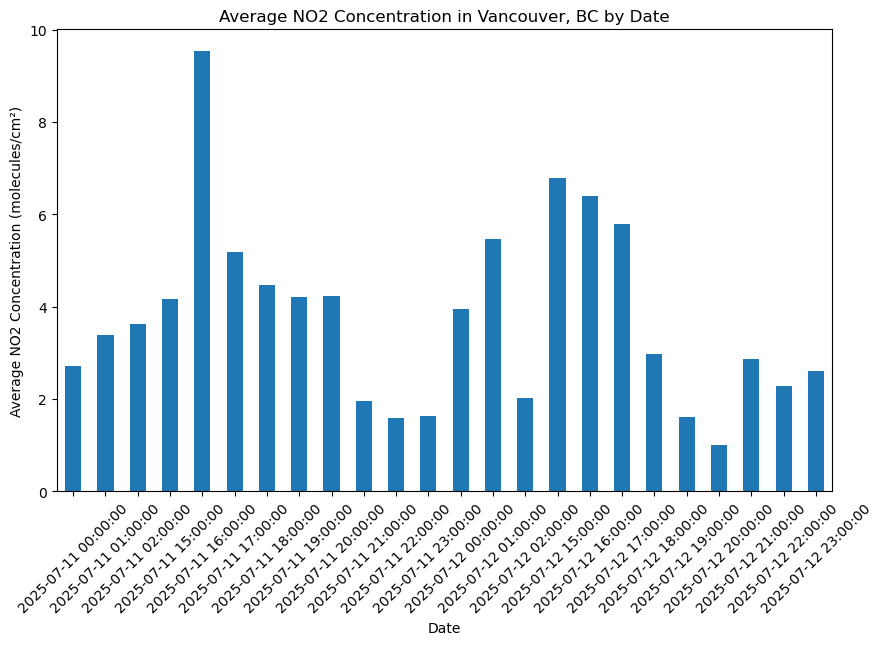

In [20]:
aggregated_df = location_df.groupby(location_df['datetime'].dt.floor('H'))['NO2_molec_cm2'].mean()
aggregated_df.head()
aggregated_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Average NO2 Concentration (molecules/cm²)')
plt.title('Average NO2 Concentration in Vancouver, BC by Date')
plt.xticks(rotation=45)